#### import required packages:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data :

In [2]:
visa_df=pd.read_csv(r"C:\Users\Adireddy\Documents\Naresh IT Data Science & AI\Data files\visadataset - visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Bi Variate Analysis :
- Analyse the two variables
- Two categorical columns
- Two numerical columns
- One categorical and one numerical column

#### Categorical vs Categorical columns :

In [5]:
visa_df.columns  # returns all columns in visa_df

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
# to return categorical columns

cat_cols=visa_df.select_dtypes(include='object').columns
cat_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
# to return numerical columns

num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

#### continent - casestatus :

In [9]:
visa_df['continent'].value_counts()    # to return number of unique value counts in continent column

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [10]:
visa_df['case_status'].value_counts()  # to return number of unique value counts in case_status column

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

#### How many Asia people got the visa certified?
#### How many Asia people got the visa denied?

In [13]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1&con2
len(visa_df[con])
print(f"The number of employees visa certified are: {len(visa_df[con])}")

The number of employees visa certified are: 11012


In [14]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Denied'
con=con1&con2
len(visa_df[con])
print(f"The number of employees visa denied are: {len(visa_df[con])}")

The number of employees visa denied are: 5849


#### Do it for all the unique countries in the continent column, 
#### How many people visa certified or denied?

In [16]:
keys=visa_df['continent'].unique()          # to return unique values in the continent column
certified_list,denied_list=[],[]
for i in keys:        # iterate through each unique value
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    denied_con=con1&con3
    certified_list.append(len(visa_df[certi_con]))
    denied_list.append(len(visa_df[denied_con]))
pd.DataFrame(zip(certified_list,denied_list),
                 columns=['Certified','Denied'],
                 index=keys)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


#### cross tab :
- This is the shortcut for the above problem
- cross tab will take two arguments
    - first argument: index
    - second argument: column

In [17]:
col1=visa_df['continent']   # take continent column
col2=visa_df['case_status']  # take case_status column
result1=pd.crosstab(col1,col2)   # here col1=index, col2=column
result1   # gives the same output as the above problem as this is a shortcut

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [ ]:
# if you interchange col2,col1
# col2 becomes index, col1 becomes column

In [18]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)   # here col2=index,col1=column
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

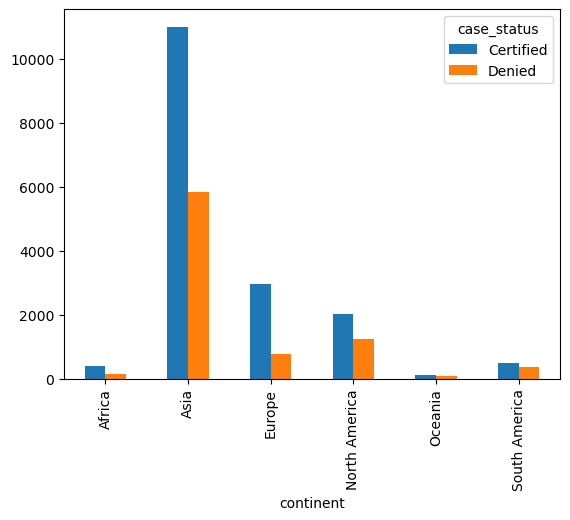

In [19]:
# to see result1 in barchart 

result1.plot(kind='bar')

<Axes: xlabel='case_status'>

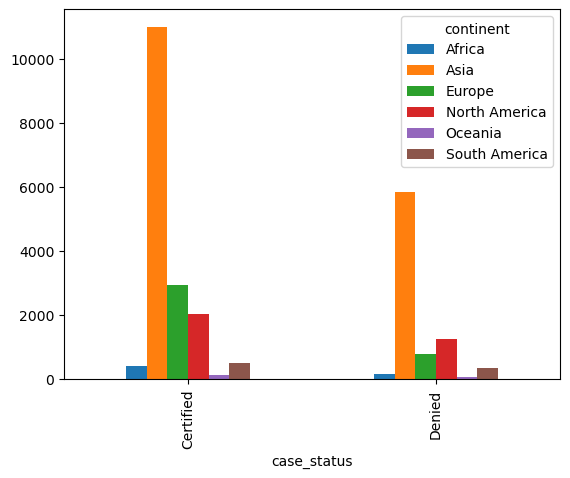

In [20]:
# to see result2 in bar chart

result2.plot(kind='bar')

**Note**:
- we can not do subplots for result1, result2 as it is pandas
- for matplotlib we can do subplots

In [26]:
# here we take 3 columns

col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]   # to merge col1,col2 into one column
result3=pd.crosstab(col,col3)   # here col is index, col3 is column
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

In [27]:
# here we take 3 columns

col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col2,col1]   # to merge col1,col2 into one column and interchanged col1,col2 compared to above problem
result4=pd.crosstab(col,col3)   # here col is index, col3 is column
result4

case_status                          Certified  Denied
education_of_employee continent                       
Bachelor's            Africa                81      62
                      Asia                4407    2761
                      Europe              1040     259
                      North America        641     584
                      Oceania               38      28
                      South America        160     173
Doctorate             Africa                43      11
                      Asia                 780     143
                      Europe               788      58
                      North America        207      51
                      Oceania               19       3
                      South America         75      14
High School           Africa                23      43
                      Asia                 676    1614
                      Europe               162     328
                      North America        210     191
                      Oceania               19      17
                      South America         74      63
Master's              Africa               250      38
                      Asia                5149    1331
                      Europe               967     130
                      North America        979     429
                      Oceania               46      22
                      South America        184     109

<Axes: xlabel='continent,education_of_employee'>

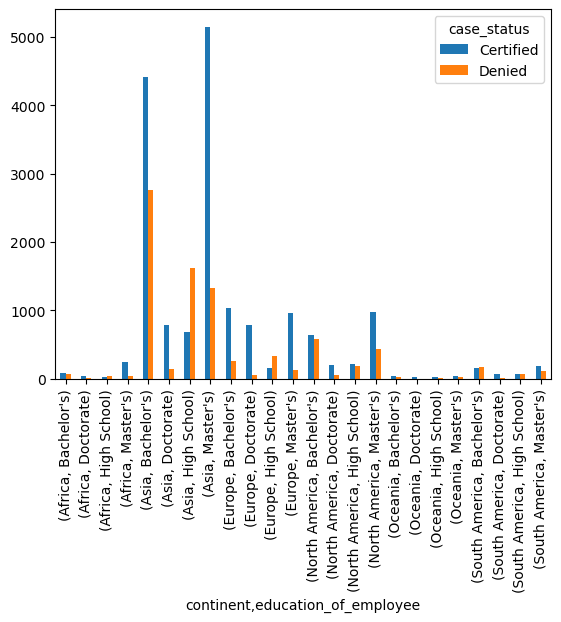

In [28]:
# to see result3 in bar chart

result3.plot(kind='bar')

#### numerical vs numerical columns :
- In order to plot numerical vs numerical we need to use scatter plots
- scatter plots will give the relation between two numerical columns
- It is under matplotlib

#### plt.scatter :

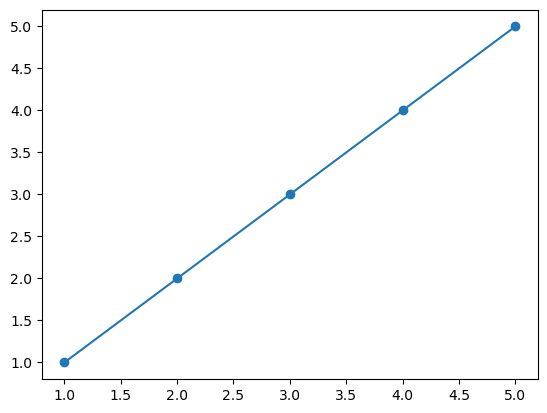

In [30]:
# y=x graph

x=[1,2,3,4,5]
y=[1,2,3,4,5]
# it is y=x plot
plt.scatter(x,y)  # gives only dots
plt.plot(x,y)     # to connect the dots with line
plt.show()       # to remove english words in the o/p

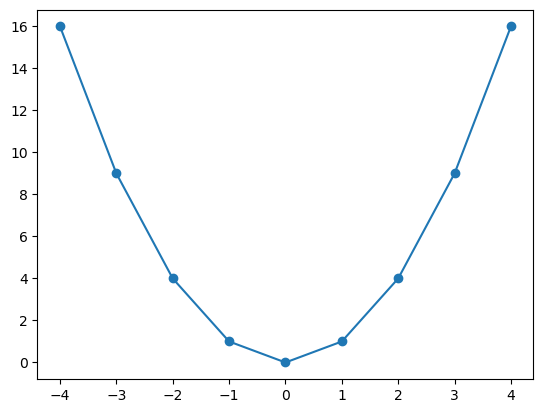

In [32]:
# y=x2 graph
# create x,y using list comprehension

x=[i for i in range(-4,5)]      # [output for loop]
y=[i*i for i in x]
plt.scatter(x,y)    # gives only dots
plt.plot(x,y)    # connects the dots with line, parabola will come
plt.show()

In [34]:
# numerical columns

num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

#### Scatter plot-1
- no_of_employees and yr_of_estab

Text(0, 0.5, 'yr_of_estab')

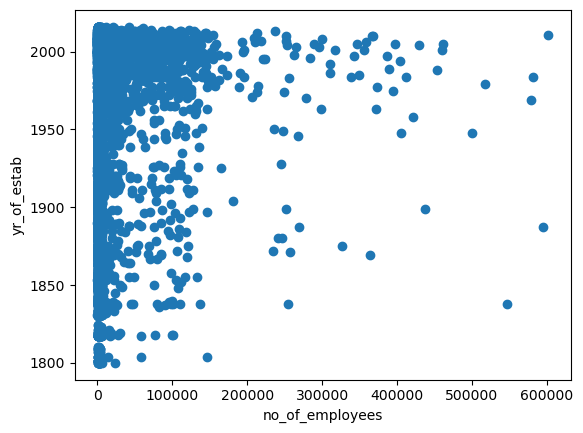

In [37]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)
plt.xlabel("no_of_employees")
plt.ylabel("yr_of_estab")

# observation of plot: no relation
# pearson correlation coefficient : 0

#### Scatter plot-2
- no_of_employees and prevailing_wage

Text(0, 0.5, 'prevailing_wage')

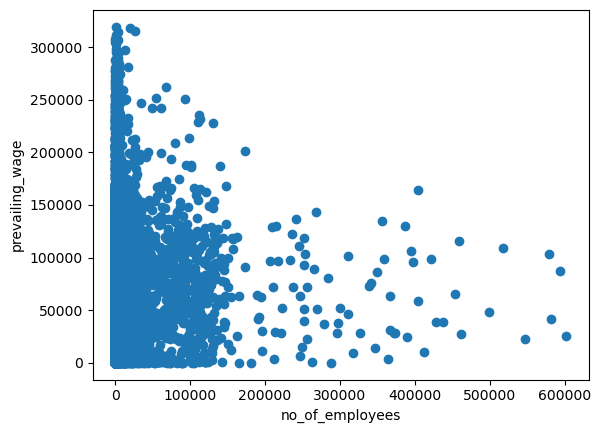

In [38]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)
plt.xlabel("no_of_employees")
plt.ylabel("prevailing_wage")

# observation of plot: no relation

- pearson correlation coefficient : 0

#### Scatter plot-3
- yr_of_estab and prevailing_wage

Text(0, 0.5, 'prevailing_wage')

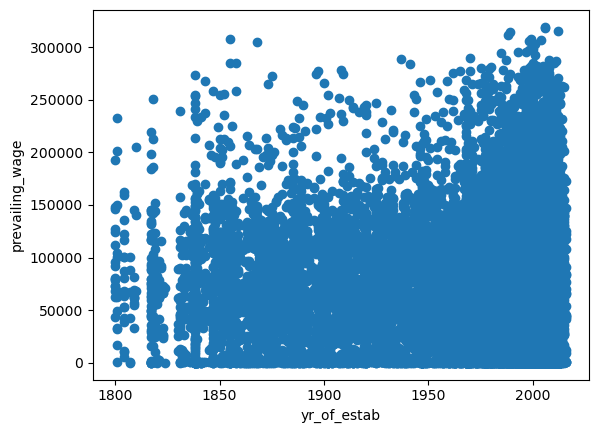

In [39]:
col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)
plt.xlabel("yr_of_estab")
plt.ylabel("prevailing_wage")

# observation of plot: no relation
# pearson correlation coefficient : 0

#### To show all three scatter plots above in subplots

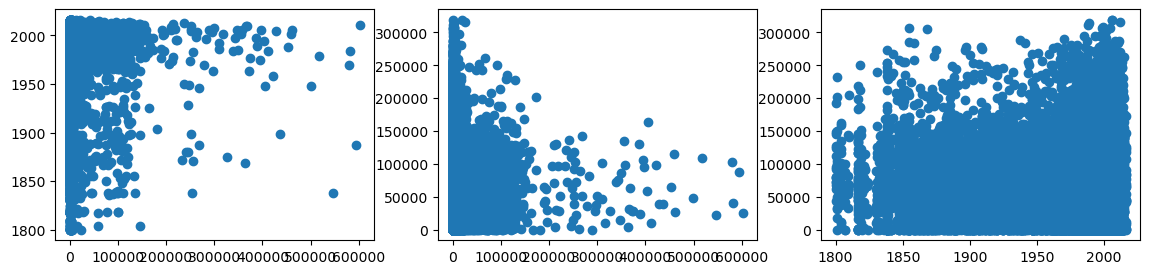

In [40]:
plt.figure(figsize=(14,3))

col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)

col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)
plt.show()

# observation of plots: no relation
# pearson correlation coefficient : 0

#### pearson correlation coefficient :

**How to get the formula image:**
- search pearson correlation coefficient formula image in google.com
- select image, right click, select inspect
- code is highlighted and you can see img class in the code
- right click again and select edit as html
- ctrl+A
- ctrl+C
- ctrl+V in the cell in jupyter notebook
- click esc+m  
- shift+enter

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="12" data-atf="0">

- Perason correlation coeffiecient will give the amount of relation between variables
- It is denoted with r
- r varies from -1 to 1
- For postive relation r varies from 0 to 1
- For negative relation r varies from -1 to 0
- For no relation r approximate 0
- In python code we have **corr** function under pandas
    - This will give covariance matrix
    - we already discussed covariance matrix is rows and columns type
    - In this data we have 3 numerical columns
    - so we will get 3*3 9 values
    - All trace of the matrix represents variance
    - Upper trainagle and lower traingle represents co variance

In [ ]:
# covariance matrix:

#  variance     covariance      covariance
#  covariance   variance        covariance
#  covariance   covariance      variance

In [41]:
visa_df.corr(numeric_only=True)   # 'corr' is the function used to get covariance matrix

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**observations in the above covariance matrix:**
    
- Variance=1

- The correlation value between **no_of_employees** and **yr_of_estab** is approximately zero
    - which indicates no relation
- The correlation value between **no_of_employees** and **prevailing_wage** is approximately zero
    - which indicates no relation
- The correlation value between **yr_of_estab** and **prevailing_wage** is approximately zero
    - which indicates no relation

In [ ]:
# download the datafile winequality_red.csv from the Datafiles, sir shared in google classroom

#### what happens if correlation is too high?

- For that we will read winequality_red.csv dataset
- We'll perform the correlation option

In [1]:
# import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the winequality_red.csv data:

In [2]:
wine_data=pd.read_csv(r"C:\Users\Adireddy\Documents\Naresh IT Data Science & AI\Data files\winequality_red.csv")
wine_data.head()     # to get first 5 rows of data in the wine_data DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.columns      # to return all the columns in wine_data dataframe

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
len(wine_data.columns)  # to return number of columns in the wine_data

12

- In this data we have 12 numerical columns 
- So we will get 12*12=144 values

In [5]:
wine_data.corr()    # to return covariance matrix we use 'corr' 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# variances are all 1.000000

#### Heat Map :
- Heat map will provide the matrix representation of correlation value
- Heat map represents values in color format
- Different different values in different color
- Beside matrix it will display color bar
- Color bar means like as scale of values with color
- It is under seaborn package

In [6]:
import seaborn as sns

In [15]:
# open anaconda prompt window and execute the below command
# pip install seaborn --upgrade  
# previous version of seaborn is 0.12.2
# to upgrade to seaborn package 0.13.2 
# restart kernel
# as we are not able to see values in the heat map boxes

<Axes: >

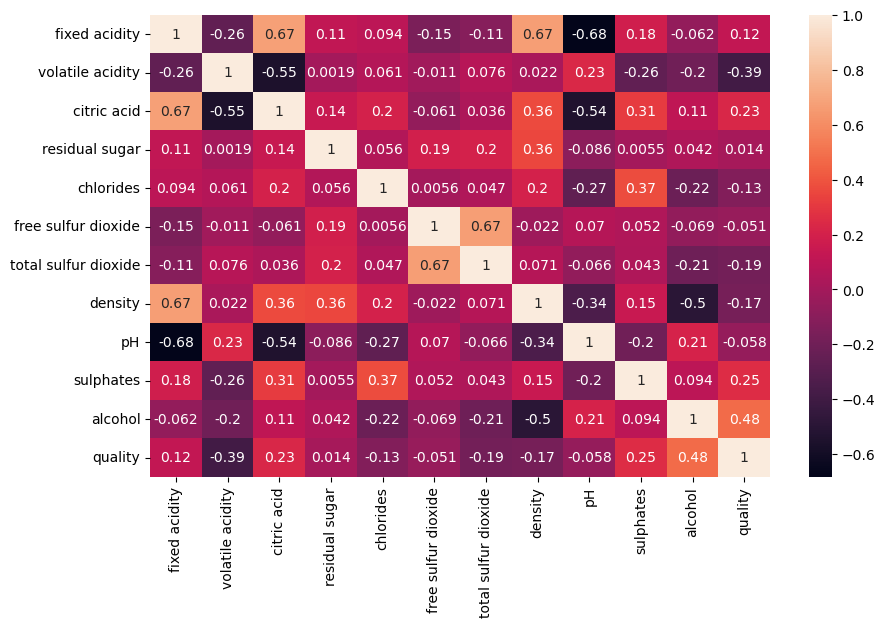

In [7]:
wine_corr=wine_data.corr()     # save covariance matrix into a variable 'wine_corr'
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,
            annot=True)        # to return covaraiance matrix in heat map with annotations

- After upgrading the seaborn package we can see the heatmap with numbers inside all boxes
- In the heat map understand the scale or color bar

#### correlation for visa dataset:

In [10]:
visa_df=pd.read_csv(r"C:\Users\Adireddy\Documents\Naresh IT Data Science & AI\Data files\visadataset - visadataset.csv")
visa_df.head()  # to return first 5 rows of visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<Axes: >

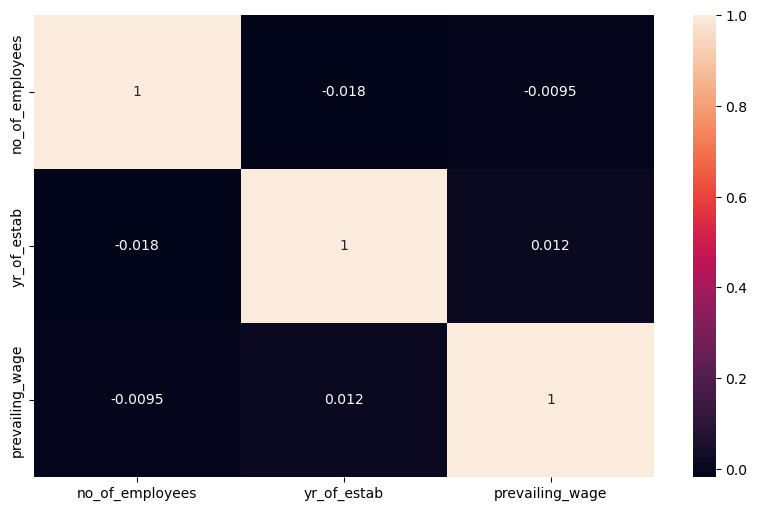

In [11]:
visa_corr=visa_df.corr(numeric_only=True)   # need to mention numeric_only=True as visa_df has categorical and numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(visa_corr,annot=True)

- According to the scale color will come

#### Draw the scatter plots for wine data columns
#### which is having highest positive correlation
#### which is having highest negative correlation
#### positive correlation means positively increased

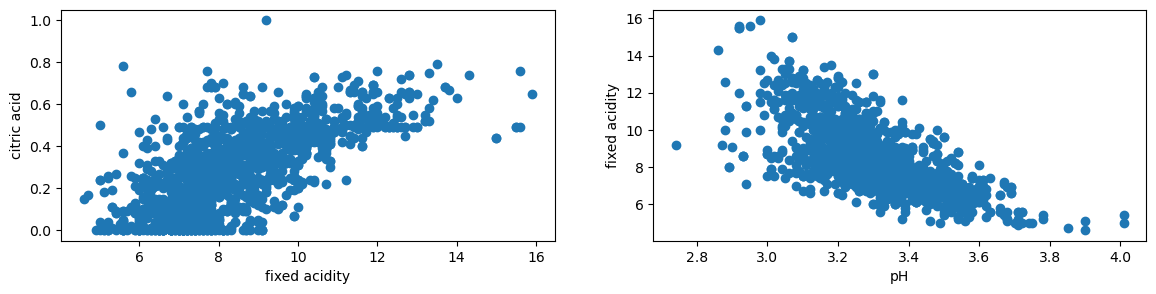

In [16]:
plt.figure(figsize=(14,3))

col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.subplot(1,2,1).scatter(col1,col2)   # this one has highest positive correlation
plt.xlabel("fixed acidity")
plt.ylabel("citric acid")    

col3=wine_data['pH']
col4=wine_data['fixed acidity']
plt.subplot(1,2,2).scatter(col3,col4)   # this one has highest negative correlation
plt.xlabel("pH")
plt.ylabel("fixed acidity")
plt.show()

# if you see in wine_data heat map fixed acidity vs citric acid has 0.67 value, which is highest value out of all values
# which shows highest positive correlation
# if you see in wine_data heat map fixed acidity vs pH has -0.68 value which is lowest value out of all values
# which shows highest negative correlation